In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [30]:
#filename_E = '../DATA/AKROSS_FieldData/CS2/CS_OFFL_SIR_SIN_1B_20220424T103346_20220424T103735_E001.nc'  
filename_E = '../DATA/AKROSS_FieldData/CS_OFFL_SIR_SIN_1B_20220424T103346_20220424T103735_E001.nc'  

In [31]:
# From https://github.com/tsutterley/read-cryosat-2
#from cryosat_toolkit import read_cryosat_L1b

#use this instead for read_cryo
import read_cryosat_L1b_modif_CB22 as read_cryo
CS_L1b_mds_CB = read_cryo.read_cryosat_L1b(filename_E)

In [32]:
CS_L1b_mds_CB['Data'].keys()

dict_keys(['TD', 'H_0', 'COR2', 'LAI', 'FAI', 'AGC_CH1', 'AGC_CH2', 'TR_gain_CH1', 'TR_gain_CH2', 'TX_Power', 'Doppler_range', 'Doppler_angle_start', 'Doppler_angle_stop', 'TR_inst_range', 'R_inst_range', 'TR_inst_gain', 'R_inst_gain', 'Internal_phase', 'External_phase', 'Noise_power', 'Phase_slope'])

In [33]:
# From 1Hz waveform info
# Mask1992 from AK site, AK1 : 69.08899 -> AK4 : 68.8216
masked_coord = []
wf2 = []
for i in range(len(CS_L1b_mds_CB['Waveform_1Hz']['Lat'])):
    #print (i,CS_L1b_mds['Location']['Second'][i,0] )
    if (CS_L1b_mds_CB['Waveform_1Hz']['Lat'][i] >= 68.8*1e7) and (CS_L1b_mds_CB['Waveform_1Hz']['Lat'][i] <= 69.09*1e7):
        masked_coord.append({'lat' : CS_L1b_mds_CB['Waveform_1Hz']['Lat'].data[i]*1e-7, 
                             'lon' : CS_L1b_mds_CB['Waveform_1Hz']['Lon'].data[i]*1e-7,
                             'alt' : CS_L1b_mds_CB['Waveform_1Hz']['Alt'].data[i]} )
        wf2.append(CS_L1b_mds_CB['Waveform_1Hz']['Waveform'].data[i] * 1e-9 * 
                  CS_L1b_mds_CB['Waveform_1Hz']['Linear_Wfm_Multiplier'].data[i] * 
                 2.0**CS_L1b_mds_CB['Waveform_1Hz']['Power2_Wfm_Multiplier'].data[i])
        
# Calc mean waveform
wf2_mean = np.mean(wf2, axis=0)

In [34]:
masked_coord

[{'lat': 68.8487079, 'lon': -105.4317184, 'alt': 725902830},
 {'lat': 68.9025753, 'lon': -105.4501119, 'alt': 725911036},
 {'lat': 68.9564412, 'lon': -105.4685768, 'alt': 725919230},
 {'lat': 69.0103054, 'lon': -105.48711379999999, 'alt': 725927410},
 {'lat': 69.064168, 'lon': -105.5057233, 'alt': 725935578}]

Text(0.5, 0, 'Bin')

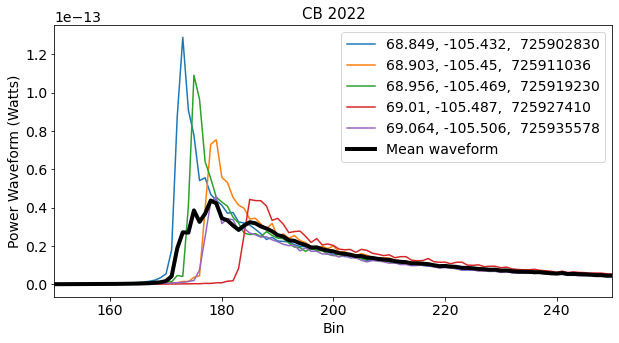

In [35]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(10, 5))
plt.title('CB 2022', size = 15)
# CB 2022
for i in range(len(wf2)):
    plt.plot(wf2[i], label=str(np.round(masked_coord[i]['lat'],3)) + ', ' + str(np.round(masked_coord[i]['lon'],3))+',  ' + str(np.round(masked_coord[i]['alt'],3)))


plt.plot(wf2_mean, 'k-', linewidth=4, label='Mean waveform')
plt.legend()
plt.ylabel('Power Waveform (Watts)')
plt.xlim(150,250)
plt.xlabel('Bin')

### Read in CryoSat2 data for 2022 in Eureka

In [36]:
filename_E22 = '../DATA/Eureka_2022/CS_OFFL_SIR_SIN_1B_20220422T085940_20220422T090109_E001.nc'  
CS_L1b_mds_E22 = read_cryo.read_cryosat_L1b(filename_E22)

# EUREKA
# From 1Hz waveform info
masked_latsE22 = []
masked_lonsE22 = []
wfE22 = []
for i in range(len(CS_L1b_mds_E22['Waveform_1Hz']['Lat'])):
    #print (i,CS_L1b_mds['Location']['Second'][i,0] )
    if (CS_L1b_mds_E22['Waveform_1Hz']['Lat'][i] >= 80.2*1e7) and (CS_L1b_mds_E22['Waveform_1Hz']['Lat'][i] <= 80.6*1e7):
        masked_latsE22.append(CS_L1b_mds_E22['Waveform_1Hz']['Lat'].data[i]*1e-7)
        masked_lonsE22.append(CS_L1b_mds_E22['Waveform_1Hz']['Lon'].data[i]*1e-7)
        wfE22.append(CS_L1b_mds_E22['Waveform_1Hz']['Waveform'].data[i] * 1e-9 * 
                  CS_L1b_mds_E22['Waveform_1Hz']['Linear_Wfm_Multiplier'].data[i] * 
                 2.0**CS_L1b_mds_E22['Waveform_1Hz']['Power2_Wfm_Multiplier'].data[i])
        
# Calc mean waveform
wfE22_mean = np.mean(wfE22[2:], axis=0)

In [53]:
masked_lonsE22

[-86.93921879999999,
 -87.0093911,
 -87.0802832,
 -87.1519069,
 -87.2242737,
 -87.2973963,
 -87.37128609999999]

In [37]:
for obs in wfE22:
    obs[-1]

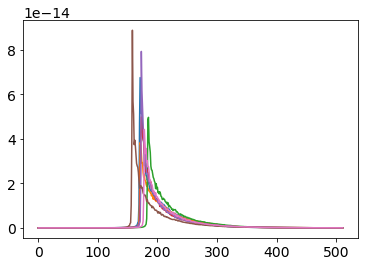

In [38]:
#plt.plot(wf2_mean)
#plt.plot(wfE22_mean)
for i in range(len(wfE22)):
    plt.plot(wfE22[i])

### Align waveform with simulation

In [39]:
import akross_common_functions as AKF
wf2_align = [AKF.align_waveform_with_sim(wave_obs) for wave_obs in wf2]
# Calc mean waveform
wf2_mean = np.mean(wf2_align, axis=0)

In [54]:
wfE22_align = [AKF.align_waveform_with_sim(wave_obs1) for wave_obs1 in wfE22]
# Calc mean waveform
wfE22_mean = np.mean(wfE22_align, axis=0)

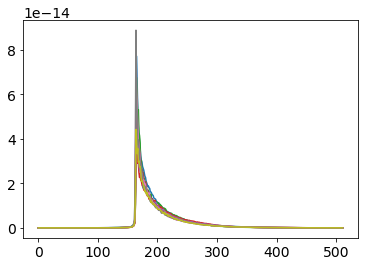

In [55]:
plt.plot(wf2_mean)
plt.plot(wfE22_mean)
for i in range(len(wfE22_align)):
    plt.plot(wfE22_align[i])

In [57]:
dict_obs = {'mean' : wfE22_mean}

with open('smrt_in-out/observed_waveform_E22', 'wb') as pickle_file:
    pickle.dump(dict_obs, pickle_file)

Text(0.5, 0, 'Bin')

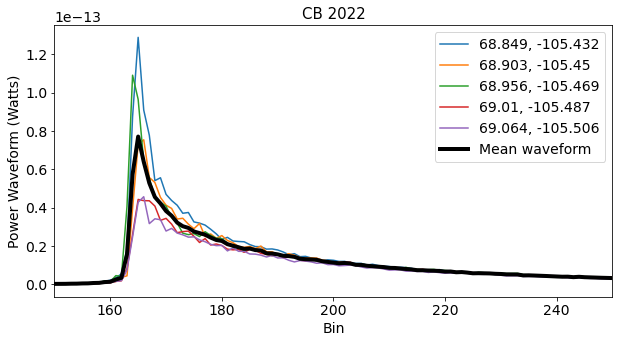

In [43]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(10, 5))
plt.title('CB 2022', size = 15)
# CB 2022
for i in range(len(wf2)):
    plt.plot(wf2_align[i], label=str(np.round(masked_coord[i]['lat'],3)) + ', ' + str(np.round(masked_coord[i]['lon'],3)))
# Calc mean waveform
wf2_mean = np.mean(wf2_align, axis=0)

plt.plot(wf2_mean, 'k-', linewidth=4, label='Mean waveform')
plt.legend()
plt.ylabel('Power Waveform (Watts)')
plt.xlim(150,250)
plt.xlabel('Bin')

## SMRT simulation from D4_CB2022_smp_processing
mean of waveform from all smp and sites

In [44]:

#import snowpit info from pickle file
with open('smrt_in-out/smp_CB_SMRT_simulation', 'rb') as pickle_file:
    smp_sim = pickle.load(pickle_file)

In [45]:
import xarray as xr
def mean_waveform(list_wave, dim):
    ds = xr.concat(list_wave, dim = dim)
    sim_mean = ds.mean(dim = dim)
    return sim_mean

sim_AK1_mean = mean_waveform(smp_sim['AK1'], dim = 'smp')
sim_AK2_mean = mean_waveform(smp_sim['AK2'], dim = 'smp')
sim_AK3_mean = mean_waveform(smp_sim['AK3'], dim = 'smp')
sim_AK4_mean = mean_waveform(smp_sim['AK4'], dim = 'smp')

sim_CB_waveform = [sim_AK1_mean, sim_AK2_mean, sim_AK3_mean, sim_AK4_mean]
sim_CB = mean_waveform(sim_CB_waveform, dim = 'site')

Text(0.5, 0, 'time (ns)')

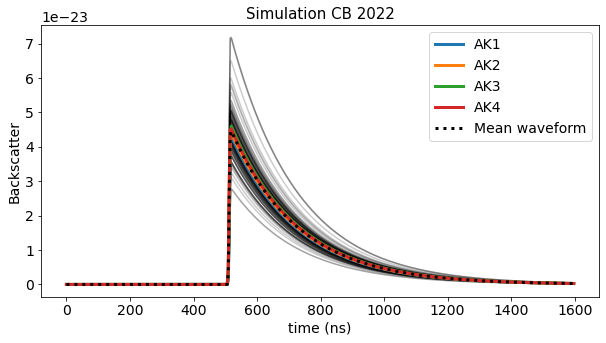

In [46]:
fig = plt.figure(figsize =(10, 5))
plt.title('Simulation CB 2022', size = 15)
# CB 2022
#plot all smp sim
for i in range(len(smp_sim['AK1'])):
    plt.plot(smp_sim['AK1'][i].t_gate*1e9, smp_sim['AK1'][i], alpha = 0.2, color = 'black')
for i in range(len(smp_sim['AK2'])):
    plt.plot(smp_sim['AK2'][i].t_gate*1e9, smp_sim['AK2'][i], alpha = 0.2, color = 'black')
for i in range(len(smp_sim['AK3'])):
    plt.plot(smp_sim['AK3'][i].t_gate*1e9, smp_sim['AK3'][i], alpha = 0.2, color = 'black')
for i in range(len(smp_sim['AK4'])):
    plt.plot(smp_sim['AK4'][i].t_gate*1e9, smp_sim['AK4'][i], alpha = 0.2, color = 'black')
    
plt.plot(sim_AK1_mean.t_gate*1e9, sim_AK1_mean, linewidth=3, label='AK1')
plt.plot(sim_AK2_mean.t_gate*1e9, sim_AK2_mean, linewidth=3, label='AK2')
plt.plot(sim_AK3_mean.t_gate*1e9, sim_AK3_mean, linewidth=3, label='AK3')
plt.plot(sim_AK4_mean.t_gate*1e9, sim_AK4_mean, linewidth=3, label='AK4')


plt.plot(sim_CB.t_gate*1e9, sim_CB, linewidth=3, label='Mean waveform', linestyle = ':', color = 'black')
plt.legend()
plt.ylabel('Backscatter')
plt.xlabel('time (ns)')

### Match observation with simulation of AK sites

In [47]:
# find closest waveform to AK sites (1-4)
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    #return index to find waveform
    pos = min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))
    print(f'return index for position : {pos}')
    
    return data.index(min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon'])))


AK1 = {'lat': 69.088986, 'lon': -105.504192}
AK2 = {'lat': 68.999853, 'lon': -105.474612}
AK3 = {'lat': 68.910657, 'lon': -105.443529}
AK4 = {'lat': 68.821597, 'lon': -105.413179}
AK1_obs = wf2_align[closest(masked_coord, AK1)]
AK2_obs = wf2_align[closest(masked_coord, AK2)]
AK3_obs = wf2_align[closest(masked_coord, AK3)]
AK4_obs = wf2_align[closest(masked_coord, AK4)]

waveform_obs = [AK1_obs, AK2_obs, AK3_obs, AK4_obs]

return index for position : {'lat': 69.064168, 'lon': -105.5057233, 'alt': 725935578}
return index for position : {'lat': 69.0103054, 'lon': -105.48711379999999, 'alt': 725927410}
return index for position : {'lat': 68.9025753, 'lon': -105.4501119, 'alt': 725911036}
return index for position : {'lat': 68.8487079, 'lon': -105.4317184, 'alt': 725902830}


## Find norm factor from Larue et al. (2021)

In [48]:
def calc_A(backscatter):
    # Eqn 18
    # Should be mean backscatter at a single site

    return np.sqrt(np.mean(backscatter ** 4) / np.mean(backscatter **2))

def normalization_factor(sim, obs):
    # Eqn 17
    return (np.sum(obs*sim) - np.sum(obs)*np.sum(sim)) / (np.sum(obs**2) - (np.sum(obs))**2)

sim = np.array([calc_A(np.mean(sim_site.values)) for sim_site in sim_CB_waveform])
obs = np.array([calc_A(np.mean(obs_site)) for obs_site in waveform_obs])
norm_f = normalization_factor(sim, obs)

In [49]:
norm_f

2.1323065912267435e-09

In [50]:
dict_obs = {'mean' : wf2_mean, 'AK1' : waveform_obs[0], 'AK2' : waveform_obs[1], 'AK3' :  waveform_obs[2], 'AK4' : waveform_obs[3],
           'norm_f' : norm_f}

with open('smrt_in-out/observed_waveform_cb22', 'wb') as pickle_file:
    pickle.dump(dict_obs, pickle_file)

In [ ]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(10, 5))
plt.title('Mean Waveform - CB22', size = 15)
# CB 2022
for i in range(len(smp_sim['AK1'])):
    plt.plot(smp_sim['AK1'][i].t_gate*1e9, smp_sim['AK1'][i]/ norm_f, alpha = 0.1, color = 'blue')
for i in range(len(smp_sim['AK2'])):
    plt.plot(smp_sim['AK2'][i].t_gate*1e9, smp_sim['AK2'][i]/ norm_f, alpha = 0.1, color = 'blue')
for i in range(len(smp_sim['AK3'])):
    plt.plot(smp_sim['AK3'][i].t_gate*1e9, smp_sim['AK3'][i]/ norm_f, alpha = 0.1, color = 'blue')
for i in range(len(smp_sim['AK4'])):
    plt.plot(smp_sim['AK4'][i].t_gate*1e9, smp_sim['AK4'][i]/ norm_f, alpha = 0.1, color = 'blue')

plt.plot(sim_CB.t_gate*1e9, sim_CB/ norm_f, linewidth=4, label='Simulated waveform', color = 'blue')
plt.plot(sim_CB.t_gate*1e9, waveform_obs[0], 'k-', linewidth=4, label='Observed waveform')
plt.legend()
plt.ylabel('Backscatter')
plt.xlabel('time (ns)')
#plt.xlim(300, 1000)

### Plot sim/obs waveform of each site

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex = True, sharey = True, figsize=(12,10))

ax1.set_title('AK1')
ax1.set_ylabel('Backscatter')
ax1.plot(sim_CB_waveform[0].t_gate*1e9, sim_CB_waveform[0].values / norm_f)
ax1.plot(sim_CB_waveform[0].t_gate*1e9, waveform_obs[0])
for i in range(len(smp_sim['AK1'])):
    ax1.plot(smp_sim['AK1'][i].t_gate*1e9, smp_sim['AK1'][i]/ norm_f, alpha = 0.2, color = 'dodgerblue')

ax2.set_title('AK2')
ax2.set_ylabel('Backscatter')
ax2.plot(sim_CB_waveform[1].t_gate*1e9, sim_CB_waveform[1].values / norm_f)
ax2.plot(sim_CB_waveform[1].t_gate*1e9, waveform_obs[1])
for i in range(len(smp_sim['AK2'])):
    ax2.plot(smp_sim['AK2'][i].t_gate*1e9, smp_sim['AK2'][i]/ norm_f, alpha = 0.2, color = 'dodgerblue')

ax3.set_title('AK3')
ax3.set_xlabel('time (ns)')
ax3.plot(sim_CB_waveform[2].t_gate*1e9, sim_CB_waveform[2].values / norm_f)
ax3.plot(sim_CB_waveform[2].t_gate*1e9, waveform_obs[2])
for i in range(len(smp_sim['AK3'])):
    ax3.plot(smp_sim['AK3'][i].t_gate*1e9, smp_sim['AK3'][i]/ norm_f, alpha = 0.2, color = 'dodgerblue')

ax4.set_title('AK4')
ax3.set_xlabel('time (ns)')
ax4.plot(sim_CB_waveform[3].t_gate*1e9, sim_CB_waveform[3].values / norm_f, label = 'simulated')
ax4.plot(sim_CB_waveform[3].t_gate*1e9, waveform_obs[3], label = 'observed')
for i in range(len(smp_sim['AK4'])):
    ax4.plot(smp_sim['AK4'][i].t_gate*1e9, smp_sim['AK4'][i]/ norm_f, alpha = 0.2, color = 'dodgerblue')
ax4.legend()
ax4.set_xlim(500,600)

### map of observation

In [ ]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [ ]:
coord_obs = pd.DataFrame(masked_coord)
lat_AK = [AK1['lat'], AK2['lat'], AK3['lat'], AK4['lat']]
lon_AK = [AK1['lon'], AK2['lon'], AK3['lon'], AK4['lon']]
#coord_obs.to_csv('D:/AKROSS/CryoSat_obs.csv')

In [ ]:
lon_AK

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,8))
#offset = 0.5
#m = Basemap(llcrnrlon=lons.min()-offset,llcrnrlat=lats.min()-offset,urcrnrlon=lons.max()+offset,urcrnrlat=lats.max()+offset, projection='merc', resolution='h',area_thresh=1000.,ax=ax)
#m = Basemap(llcrnrlon=-150,llcrnrlat=65,urcrnrlon=-20,urcrnrlat=85, projection='merc', resolution='h',area_thresh=1000.,ax=ax)
#m = Basemap(llcrnrlon=-100,llcrnrlat=78,urcrnrlon=-40,urcrnrlat=87, projection='merc', resolution='l',area_thresh=1000.,ax=ax)
m = Basemap(llcrnrlon=-106.5,llcrnrlat=68.5,urcrnrlon=-104,urcrnrlat=69.4, projection='merc', resolution='h',area_thresh=1000.,ax=ax)

m.drawcoastlines() #draw coastlines on the map
m.fillcontinents(color='lightgrey')
m.plot(coord_obs.lon, coord_obs.lat, 'co', markersize=8, latlon=True, label='CryoSat obs')
m.plot(lon_AK, lat_AK, 'mx', markersize=6, latlon=True, label='Snowpit')

plt.title('2016/17 SMP measurements', fontsize=16)
ax.legend(loc='lower right', fontsize=16)


x2, y2 = m(-105.02, 69.115345)

m.plot(-105.059312, 69.115345, 'rs', latlon=True)
ax.text(x2, y2, 'Ikaluktutiak', color='r')

